In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# load data 
cars = pd.read_csv('./project.csv')
# mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name

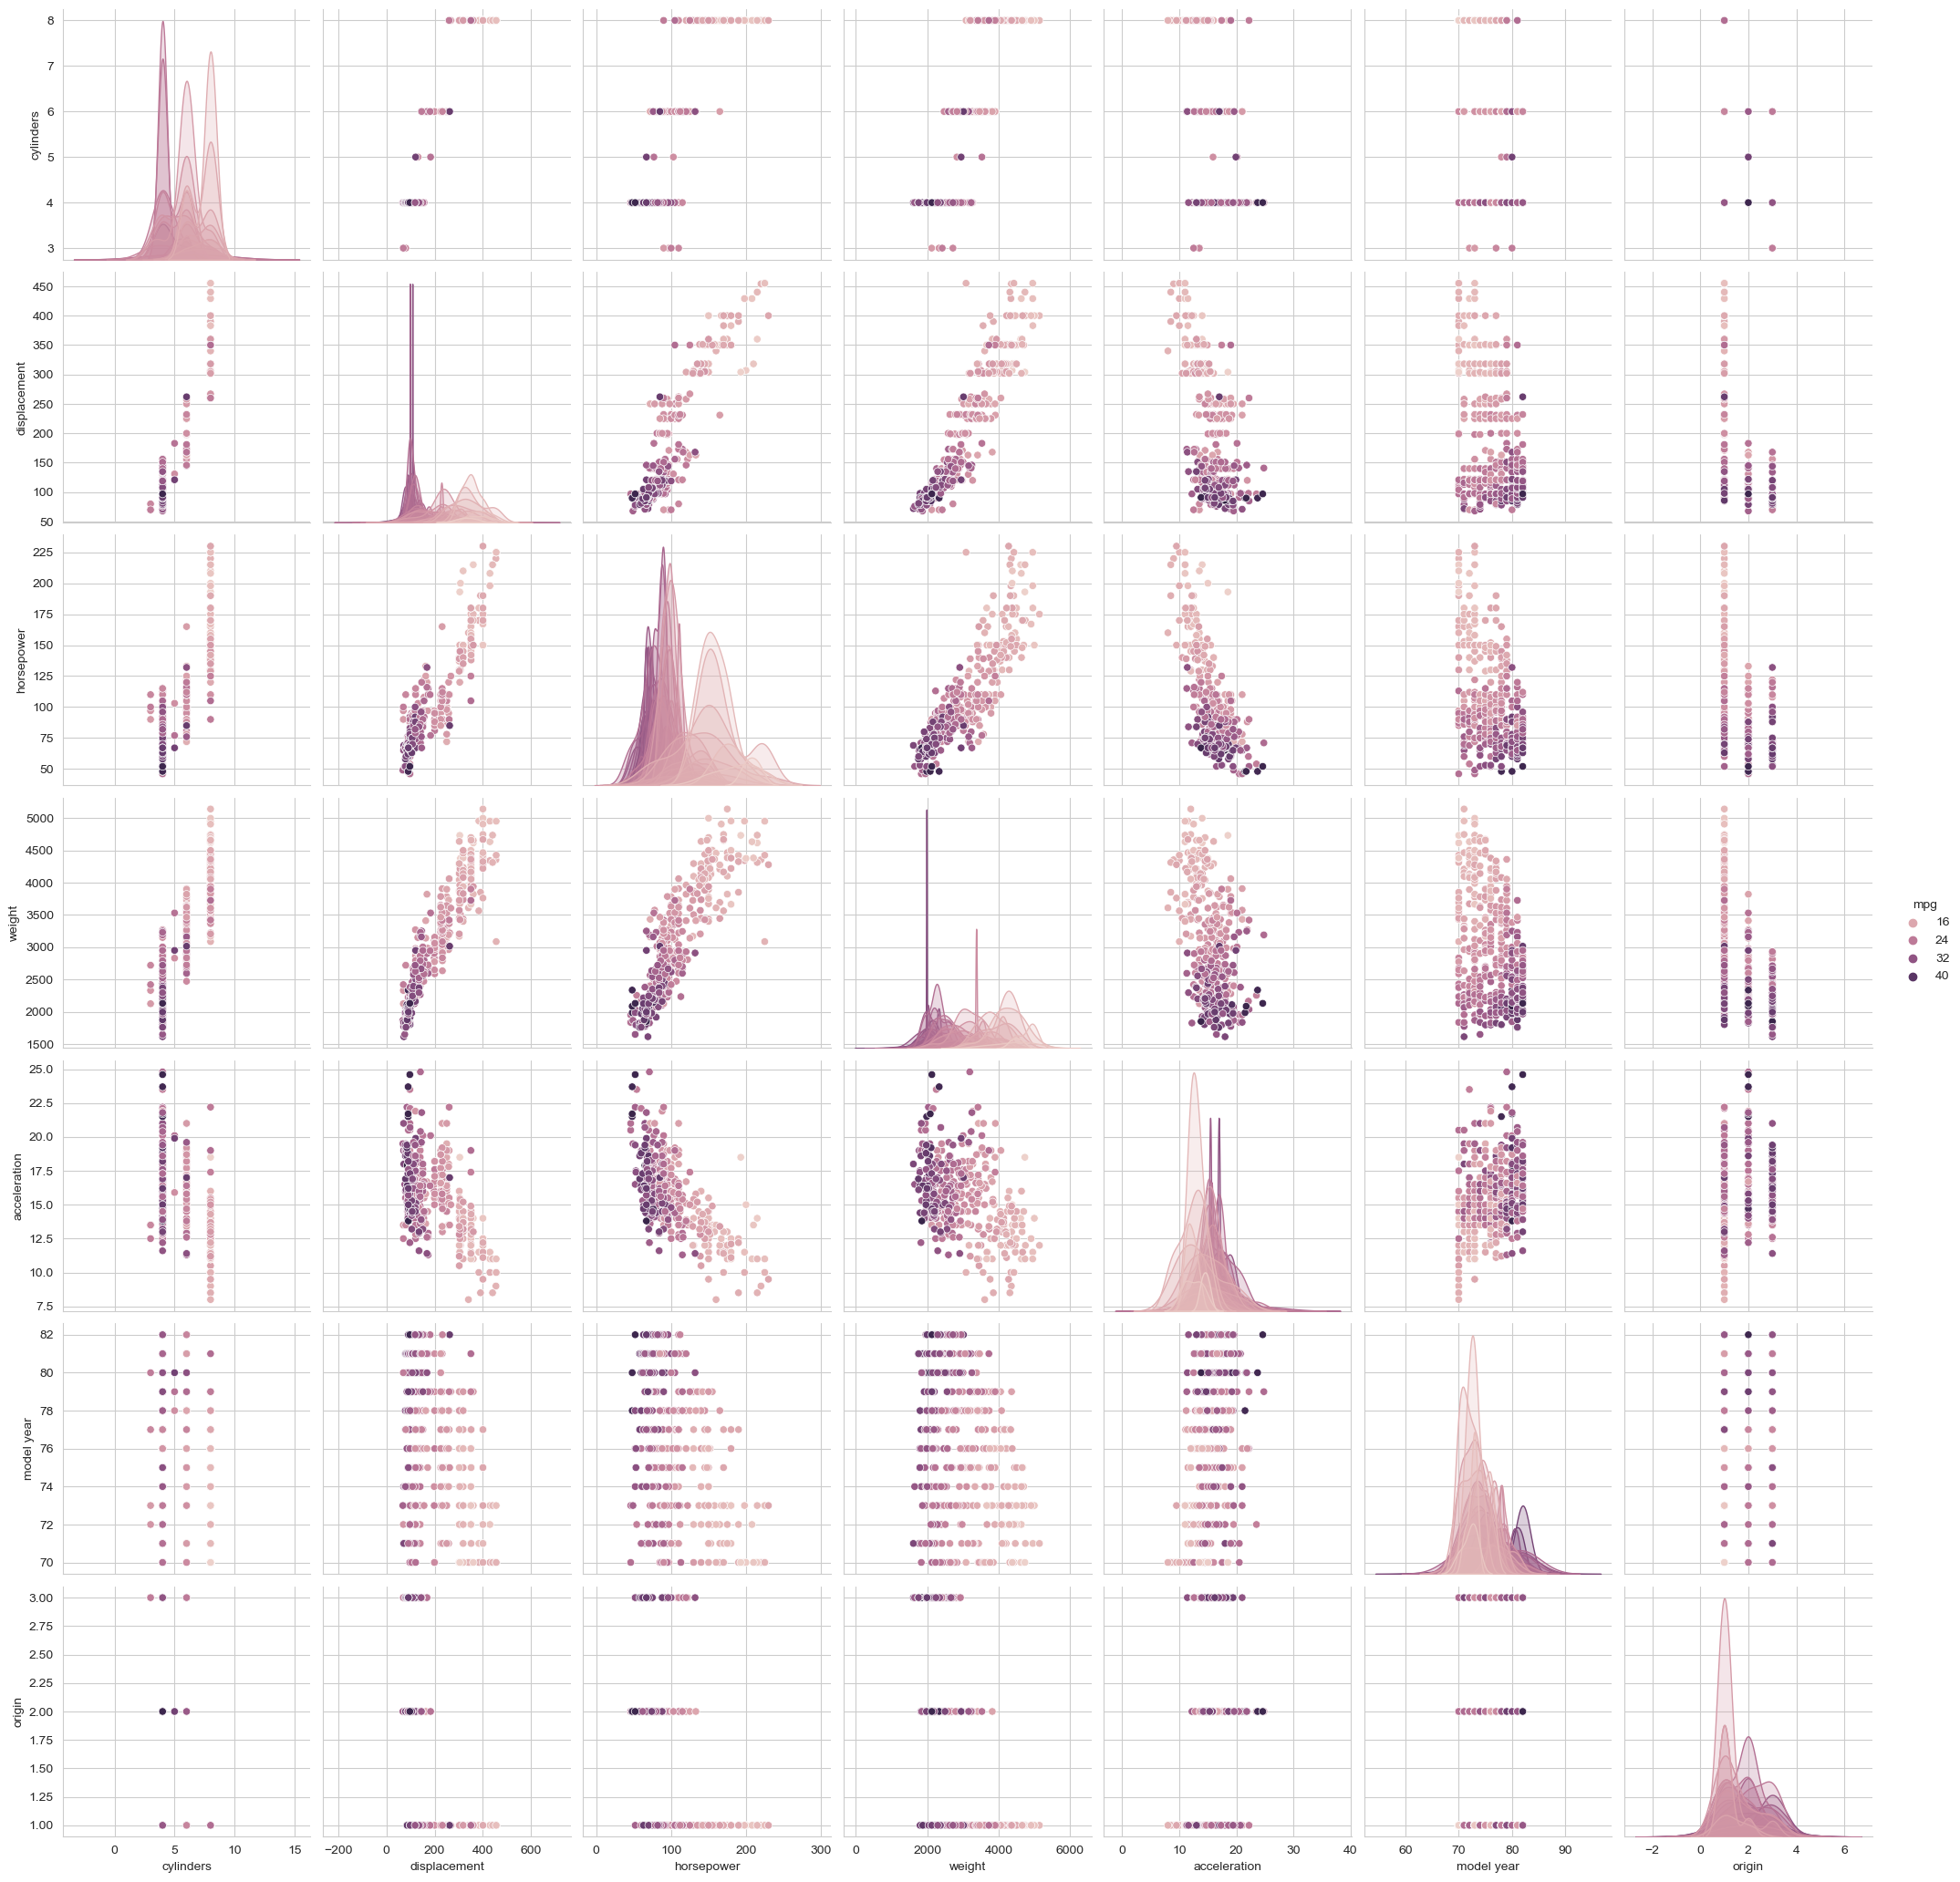

In [3]:
sns.set_style("whitegrid");
sns.pairplot(cars, hue="mpg", height=3); 
plt.show()

/var/folders/tm/8dt110sx68j8sppv0f86n9fw0000gn/T/ipykernel_83365/1765991130.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars.corr(), annot = True, vmin=-1, vmax=1, center= 0)


<Axes: >

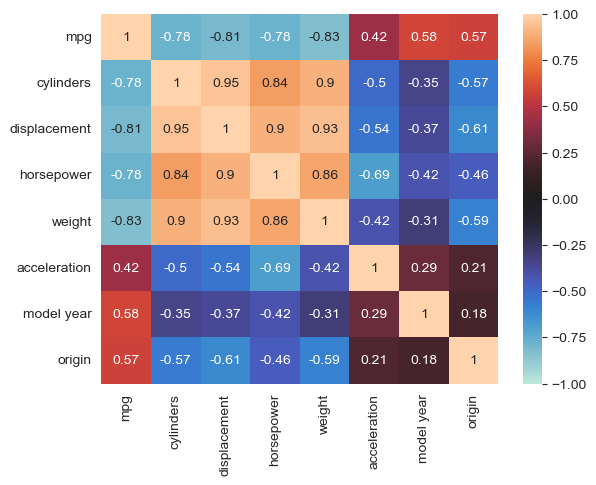

In [5]:
df = pd.DataFrame(cars)  
sns.heatmap(cars.corr(), annot = True, vmin=-1, vmax=1, center= 0) 

Based on the heatmap we can see that there is a stronger relationship between mpg and the attributes cylinders, displacement, horsepower and weight. 

We started off by building a neural network that trained an all of the attributes

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# split data into inputs & output
X = cars.drop(['mpg', 'car name'], axis = 1)
y = cars['mpg']

# normalize data
scaler = MinMaxScaler(feature_range=(0,1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

# split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#Learning rate should be 0.3
#Number of epochs should be 500
mlp = MLPRegressor(solver='adam', random_state = 42, activation='relu', learning_rate_init=0.3, batch_size = 100, hidden_layer_sizes=(4,), max_iter = 500)

mlp.fit(X_train, y_train)
score = mlp.score(X_test, y_test)
pred = mlp.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = mlp.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE: ", MSE)
print("R2: ", R2)

MSE:  5.427158224600686
R2:  0.8909251501524041


After looking at the output of the above neural network, we decided to them run one where we only have the attributes that seem to have the most correlation to mpg. This is determined to be cylinders, displacement, horsepower and weight by our heatmap. 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# split data into inputs & output
X = cars.drop(['mpg', 'car name', 'acceleration', 'model year', 'origin'], axis = 1)
y = cars['mpg']

# normalize data
scaler = MinMaxScaler(feature_range=(0,1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

# split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#Learning rate should be 0.3
#Number of epochs should be 500
mlp = MLPRegressor(solver='adam', random_state = 42, activation='relu', learning_rate_init=0.3, batch_size = 100, hidden_layer_sizes=(4,), max_iter = 500)

mlp.fit(X_train, y_train)
score = mlp.score(X_test, y_test)
pred = mlp.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = mlp.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE: ", MSE)
print("R2: ", R2)

MSE:  23.010615694667784
R2:  0.7057909030364317


Based on these findings we can see that...

From here, we decised to expaind our seach for a better neral network. The above hyperparameters used were picked arbitarity. After carful consideraions, we decided to look at the following properties in the listed ranges. 
...
...
In order to run all of these tests, be used GridSearchCV

In [ ]:
#do grid search 

Look at the results
form a conclusion
edit the test
run on test data to check for overfitting/underfitting

build the front end 
connect to front end
write presentation slides